In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [10]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

X = digits.data
y = digits.target

(1797, 64)


## GMM without Dimentionality Reduction

In [27]:
from sklearn.mixture import GaussianMixture

aics = {c: [] for c in range(10)}
for nc in range(1, 25):
    for c in range(10):
        gm = GaussianMixture(n_components=nc, random_state=123).fit(X[y==c])
        aics[c].append(gm.aic(X[y==c]))

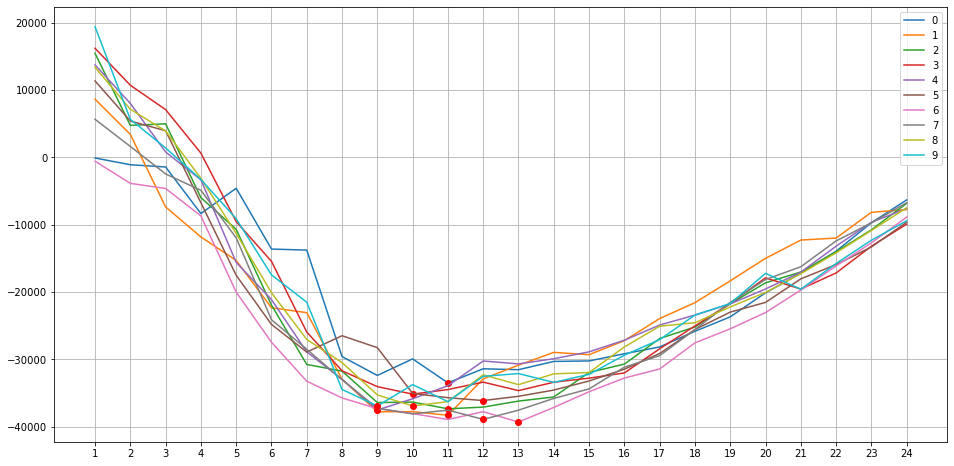

In [30]:
plt.figure(figsize=(16, 8))

for c in range(10):
    plt.plot(range(1, 25), aics[c], label=str(c))
    idx = np.argmin(aics[c])
    plt.plot(idx+1, aics[c][idx], 'ro')
plt.xticks(range(1, 25))

plt.grid()
plt.legend()
plt.show()

In [31]:
gms = {c: None for c in range(10)}
for c in range(10):
    gms[c] = GaussianMixture(n_components=11, random_state=123).fit(X[y==c])

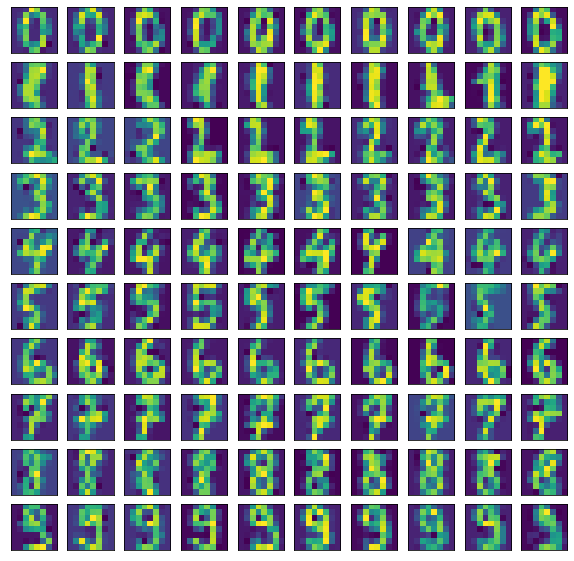

In [50]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for c in range(10):
    samples = gms[c].sample(10)[0]
    for i in range(10):
        axs[c][i].imshow(samples[i].reshape(8, 8))
        axs[c][i].set_xticks([])
        axs[c][i].set_yticks([])

## GMM with Dimentionality Reduction

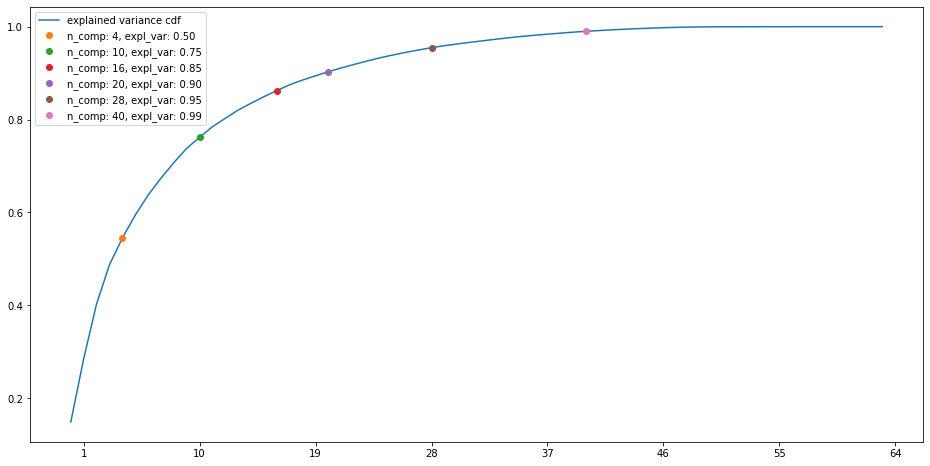

In [56]:
from sklearn.decomposition import PCA

pca = PCA(random_state=123).fit(X)

plt.figure(figsize=(16, 8))
cdf = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(len(cdf)), cdf, label='explained variance cdf')
plt.xticks(range(1, pca.components_.shape[0]+1, 9))

for limit in [0.5, 0.75, 0.85, 0.9, 0.95, 0.99]:
    idx = np.argmax(cdf>=limit)
    plt.plot(idx, cdf[idx], 'o', label='n_comp: %d, expl_var: %0.2f' % (idx, limit))

plt.legend()
plt.show()

In [57]:
pca = PCA(n_components=40, random_state=123).fit(X)
X_trans = pca.transform(X)

In [58]:
from sklearn.mixture import GaussianMixture

aics = {c: [] for c in range(10)}
for nc in range(1, 25):
    for c in range(10):
        gm = GaussianMixture(n_components=nc, random_state=123).fit(X_trans[y==c])
        aics[c].append(gm.aic(X_trans[y==c]))

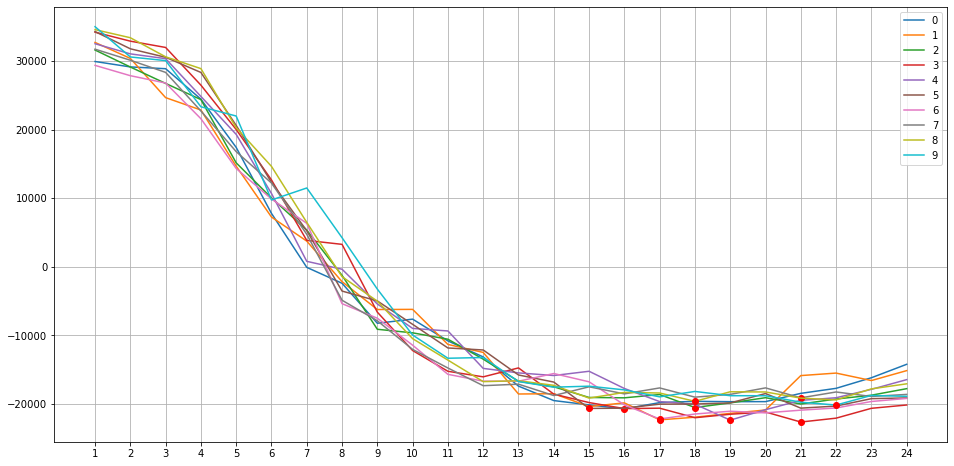

In [59]:
plt.figure(figsize=(16, 8))

for c in range(10):
    plt.plot(range(1, 25), aics[c], label=str(c))
    idx = np.argmin(aics[c])
    plt.plot(idx+1, aics[c][idx], 'ro')
plt.xticks(range(1, 25))

plt.grid()
plt.legend()
plt.show()

In [62]:
gms = {c: None for c in range(10)}
for c in range(10):
    gms[c] = GaussianMixture(n_components=18, random_state=123).fit(X_trans[y==c])

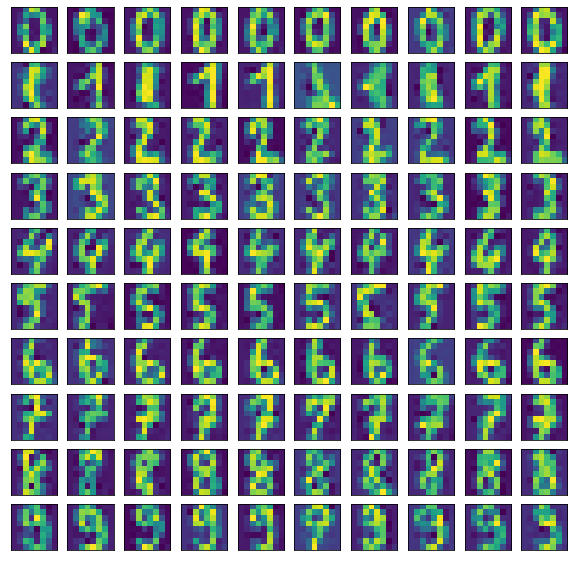

In [64]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for c in range(10):
    samples = gms[c].sample(10)[0]
    samples = pca.inverse_transform(samples)
    for i in range(10):
        axs[c][i].imshow(samples[i].reshape(8, 8))
        axs[c][i].set_xticks([])
        axs[c][i].set_yticks([])